In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from KNN import KNN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.decomposition import PCA
import pickle

In [2]:
data_path = 'FourClassDS.csv'
data = pd.read_csv(data_path)

In [3]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# Pickle the instance
with open('standart_scaler.pkl', 'wb') as output:  # Note 'wb' for write binary
    pickle.dump(scaler, output, pickle.HIGHEST_PROTOCOL)

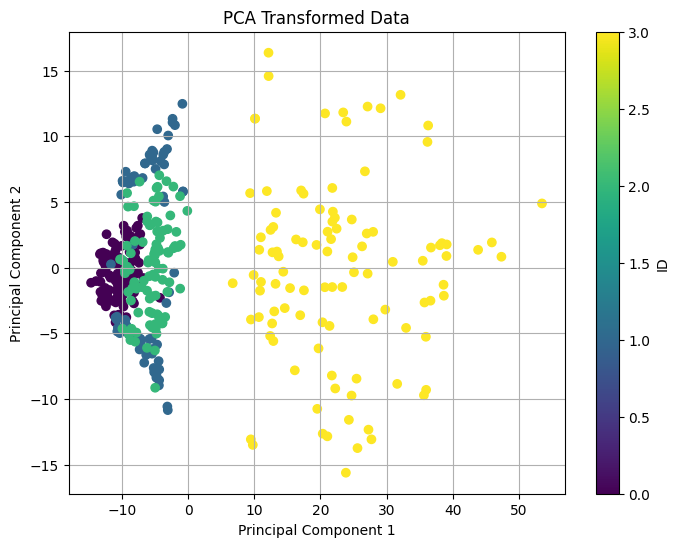

In [6]:
# Apply PCA to reduce dimensionality to 2 for visualization
pca = PCA(n_components=120)
X_pca = pca.fit_transform(X)

# Display the transformed features shape and variance ratio
X_pca_shape = X_pca.shape
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='ID')
plt.grid(True)
plt.show()

In [7]:
# Separate features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [8]:
def cross_validation(X, y, num_folds=5, k_values=range(1, 30)):
        
    fold_sizes = int(len(X) / num_folds)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    k_accuracies = {}
    for k in range(1, 30):
        k_accuracies[k] = []  

    k_errors = {}
    for k in range(1, 30):
        k_errors[k] = []         

    for fold in range(num_folds):
        # Create train and test indices for the fold
        test_indices = indices[fold * fold_sizes:(fold + 1) * fold_sizes]
        train_indices = np.delete(indices, np.arange(fold * fold_sizes, (fold + 1) * fold_sizes))
        
        # Split the dataset into a train and test set
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        
        # Test each k value
        for k in k_values:
            knn = KNN(k)
            knn.fit(X_train, y_train)
            predictions = knn.predict(X_test)
            accuracy = accuracy_score(y_test, predictions)
            k_accuracies[k].append(accuracy)
            k_errors[k].append(1 - accuracy) 

    
    for k in k_values:
        k_accuracies[k] = np.mean(k_accuracies[k])
        k_errors[k] = np.mean(k_errors[k])
    
    best_k = max(k_accuracies, key=k_accuracies.get)

    # Plot the results for accuracy
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)  # First subplot for accuracy
    plt.plot(list(k_accuracies.keys()), list(k_accuracies.values()), marker='o', color='b')
    plt.xlabel('Number of Neighbors: k')
    plt.ylabel('Average Accuracy')
    plt.title('K-Value vs Accuracy')
    plt.grid(True)

    # Plot the results for error
    plt.subplot(1, 2, 2)  # Second subplot for error
    plt.plot(list(k_errors.keys()), list(k_errors.values()), marker='o', color='r')
    plt.xlabel('Number of Neighbors: k')
    plt.ylabel('Average Validation Error')
    plt.title('K-Value vs Validation Error')
    plt.grid(True)
    
    plt.show()
    return best_k, k_accuracies[best_k], k_accuracies

In [9]:
#best_k, best_accuracy, all_accuracies = cross_validation(X, y)
#print(f"Best k: {best_k} with Accuracy: {best_accuracy:.2f}")

In [10]:
knn = KNN(1)
knn.fit(X_train, y_train)

In [11]:
train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)
print(accuracy_score(y_test, test_predictions))
print(accuracy_score(y_train, train_predictions))

0.8674698795180723
0.9115853658536586


In [22]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=1)  # You can adjust the number of neighbors (k) here

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8795180722891566


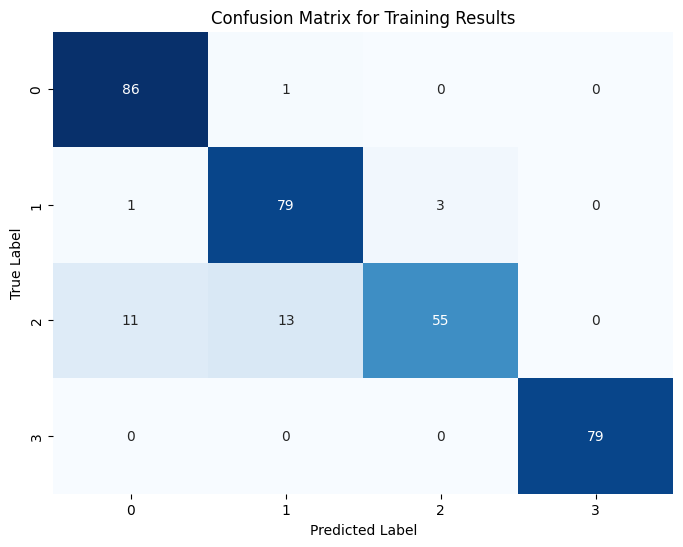

In [12]:
conf_matrix_train = confusion_matrix(y_train, train_predictions)
conf_matrix_test = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Training Results')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
macro_prec = precision_score(y_train, train_predictions, average='macro')
micro_prec = precision_score(y_train, train_predictions, average='micro')

macro_recall = recall_score(y_train, train_predictions, average='macro')
micro_recall = recall_score(y_train, train_predictions, average='micro')

macro_f1 = f1_score(y_train, train_predictions, average='macro')
micro_f1 = f1_score(y_train, train_predictions, average='micro')

print("Precision | Micro: ", micro_prec, " Macro: ", macro_prec)
print("Recall | Micro: ", micro_recall, " Macro: ", macro_recall)
print("F1 Score | Micro: ", micro_f1, " Macro: ", macro_f1)

Precision | Micro:  0.9115853658536586  Macro:  0.9188223120171317
Recall | Micro:  0.9115853658536586  Macro:  0.9091288769219172
F1 Score | Micro:  0.9115853658536586  Macro:  0.9075941776215499


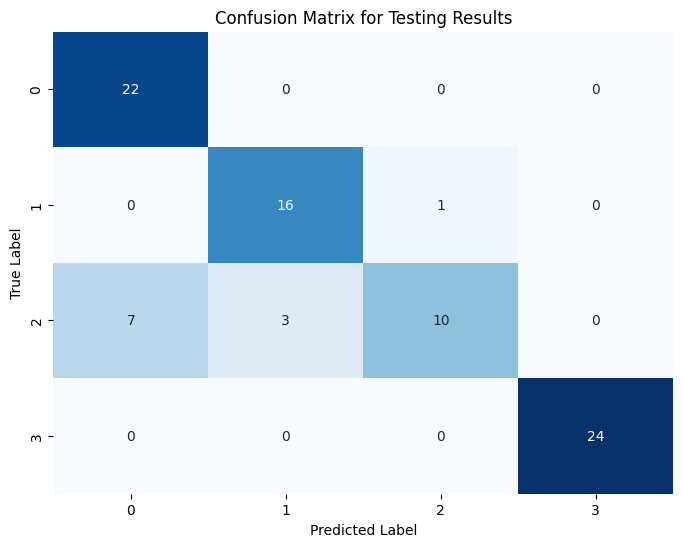

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Testing Results')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
macro_prec = precision_score(y_test, test_predictions, average='macro')
micro_prec = precision_score(y_test, test_predictions, average='micro')

macro_recall = recall_score(y_test, test_predictions, average='macro')
micro_recall = recall_score(y_test, test_predictions, average='micro')

macro_f1 = f1_score(y_test, test_predictions, average='macro')
micro_f1 = f1_score(y_test, test_predictions, average='micro')

print("Precision | Micro: ", micro_prec, " Macro: ", macro_prec)
print("Recall | Micro: ", micro_recall, " Macro: ", macro_recall)
print("F1 Score | Micro: ", micro_f1, " Macro: ", macro_f1)

Precision | Micro:  0.8674698795180723  Macro:  0.877454215475994
Recall | Micro:  0.8674698795180723  Macro:  0.8602941176470589
F1 Score | Micro:  0.8674698795180723  Macro:  0.8491988193126713


In [16]:
# Pickle the instance
with open('knn.pkl', 'wb') as output:  # Note 'wb' for write binary
    pickle.dump(knn, output, pickle.HIGHEST_PROTOCOL)